# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [1]:
import pandas as pd

In [3]:
train = pd.read_csv('train')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


In [4]:
train.columns

Index(['title', 'description', 'Category_name', 'Category'], dtype='object')

In [5]:
train.shape

(4234042, 4)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [7]:
train.isna().any() # Пропуски данных в обучающей по признаками

title            False
description       True
Category_name    False
Category         False
dtype: bool

In [8]:
test.isna().any() # Пропуски данных в тестовой по признакам

title          False
description     True
itemid         False
dtype: bool

In [4]:
train = train.fillna("")
test = test.fillna("")

print('Теперь ситуация с пропусками:')
print('На обуч:')
train.isna().any() # Пропуски данных в обучающей

Теперь ситуация с пропусками:
На обуч:


title            False
description      False
Category_name    False
Category         False
dtype: bool

In [10]:
print('На тестово:')
test.isna().any() # Пропуски данных в тестовой

На тестово:


title          False
description    False
itemid         False
dtype: bool

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [5]:
train['title&describtion'] = train['title'] + " " + train['description']
test['title&describtion'] = test['title'] + " " + test['description']

## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [12]:
train.columns # Смотрим как называются все признаки, в поисках категории

Index(['title', 'description', 'Category_name', 'Category',
       'title&describtion'],
      dtype='object')

Далее за таргет будет принят именно Category, так как с Category_name будет сложнее работать - строка

In [13]:
print(f"Нужно предсказать {train['Category_name'].nunique()} уникальных классов. \n Проверка на совпадение количества классов и их названия {train['Category'].nunique() == train['Category_name'].nunique()}")

Нужно предсказать 50 уникальных классов. 
 Проверка на совпадение количества классов и их названия True


In [347]:
import matplotlib.pyplot as plt

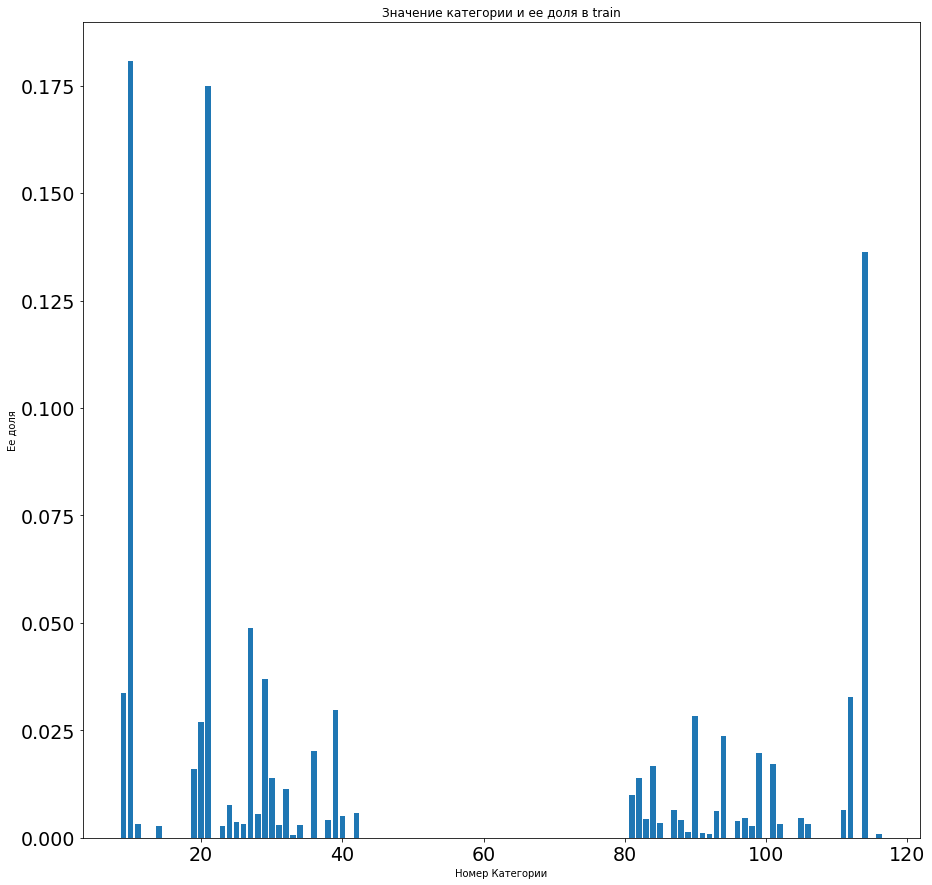

In [374]:
fig, ax = plt.subplots(figsize = (15,15))
plt.bar(list(train["Category"].unique()), list(train["Category"].value_counts(normalize=True)))
plt.rc("xtick")
plt.rc("ytick")
plt.title("Значение категории и ее доля в train")
plt.xlabel("Номер Категории")
plt.ylabel("Ее доля")
plt.show()

Дисбаланс наблюдается) Есть значимый разрыв с 42 по 80 категорию, и значимый вес от 10 до 20 - только у 10 категории

In [375]:
train["Category"].value_counts(normalize=True)

27     0.180707
10     0.174939
29     0.136394
30     0.048775
20     0.037018
24     0.033593
19     0.032756
9      0.029706
114    0.028378
84     0.026850
36     0.023761
39     0.020163
32     0.019681
88     0.017110
21     0.016754
101    0.016079
83     0.013948
28     0.013918
25     0.011392
87     0.010047
40     0.007590
111    0.006403
26     0.006381
97     0.006217
105    0.005854
106    0.005459
42     0.005179
34     0.004603
99     0.004599
98     0.004359
38     0.004138
81     0.004055
82     0.004012
90     0.003647
31     0.003524
89     0.003239
96     0.003236
85     0.003148
94     0.003136
112    0.003082
102    0.002874
93     0.002805
14     0.002798
23     0.002758
92     0.001235
11     0.001152
116    0.000974
91     0.000854
33     0.000682
86     0.000039
Name: Category, dtype: float64

Таким образом, наибольший вес у категории 27 (0.180707), а наименьший - 86 (0.000039)

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train["title&describtion"])

In [6]:
X.shape

(4234042, 2125805)

In [18]:
train["title&describtion"]

0          Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 ...
1          Утюг утп 1000 ватт СССР 1987 год Продам/\n Фот...
2          Возвму машину с выкупом Возьму машину в аренду...
3          Полусапожки полусапожки в отличном состоянии, ...
4          Босоножки кожаные Кожаные(натур) босоножки Kar...
                                 ...                        
4234037    Мопед Дельта Мотоланд 70 кубиков Продам новый ...
4234038    Xiaomi A2 4/64 почти новый (б/у 3 дня) Xiaomi ...
4234039    Шерстяной комбинезон Joha В отличном состоянии...
4234040                        Джинсы фирмы Zara р.152 Новые
4234041    Дом 105 м² на участке 10 сот. Продам полдома ,...
Name: title&describtion, Length: 4234042, dtype: object

In [174]:
print(f"Количество уникальных элм в train, по мнению {cnt_vec} = {len(cnt_vec.get_feature_names())}")

Количество уникальных элм в train, по мнению CountVectorizer() = 2125805


## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [7]:
slovar = list(cnt_vec.vocabulary_.keys())

In [16]:
start_with_numbers = [i for i in slovar if i[0] in '1234567890']
print(f"Их количество {len(start_with_numbers)}")
start_with_numbers

Их количество 610871


['2001',
 '2008',
 '1000',
 '1987',
 '350',
 '405',
 '450',
 '10',
 '40',
 '20',
 '42',
 '44',
 '2000',
 '2006',
 '27808641',
 '14',
 '500',
 '00',
 '30',
 '39',
 '2012',
 '43018jn00a',
 '3744',
 '2019',
 '29',
 '2019г',
 '05',
 '59',
 '15',
 '000',
 '18',
 '4000',
 '150',
 '2010',
 '2017г',
 '60',
 '25',
 '40000',
 '46',
 '48',
 '200',
 '100',
 '3000',
 '35',
 '1866',
 '1880',
 '250',
 '2009',
 '3500',
 '1855',
 '1881',
 '1876',
 '1878',
 '1872',
 '50',
 '1918',
 '1919',
 '1921',
 '1922',
 '1923',
 '1924',
 '1925',
 '1926',
 '1928',
 '1932',
 '1934',
 '1937',
 '1938',
 '1947',
 '1957',
 '7000',
 '1769',
 '120',
 '12',
 '55',
 '2x34',
 '9x23',
 '2100',
 '65',
 '3x45',
 '3x26',
 '2700',
 '75',
 '3x53',
 '9x30',
 '3100',
 '625zz',
 '80025',
 '5x16x5мм',
 '3д',
 '70шт',
 '86',
 '92',
 '999',
 '150мм',
 '5т',
 '56k',
 '03',
 '09',
 '2003',
 '0012027',
 '21',
 '12квт',
 '14х23см',
 '171',
 '58',
 '109',
 '81',
 '34',
 '22',
 '2002',
 '074906461b',
 '4394872',
 '124',
 '7911g',
 '7912g',
 '1

In [17]:
from string import punctuation


start_with_punct = [i for i in slovar if i[0] in punctuation]
print(f"Их количество {len(start_with_punct)}")
start_with_punct

Их количество 2043


['____________________________________________________',
 '______________________________________________________',
 '____________________________________________________________',
 '________________________________________________________',
 '_______________________________________________________',
 '______________________',
 '__основы',
 '__изучение',
 '__импровизация',
 '__жанровые',
 '___________________________________________',
 '__________________',
 '______________________________________________',
 '_____________________________________________________',
 '________________________________',
 '__________________________________________________',
 '________________________',
 '_________________________',
 '__________________________',
 '___________________________',
 '___________________________________________________',
 '________________________________________________',
 '__________________________________',
 '_______________________________________________________________',

## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [8]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords

In [9]:
def token_pro(x):
    stop_words = stopwords.words('russian') + stopwords.words('english') #Объединим, чтобы убрать грязь на обоих языках
    rus_stemmer = SnowballStemmer('russian')
    stroka = [rus_stemmer.stem(w) for w in word_tokenize(x.lower()) if w.isalpha() and w not in stop_words]
    # List-comprehension с условиями: 
    #1) Чтобы полуенное слово не содержало цифр и других знаков
    #2) Чтобы оно не являлось той самой грязью))
    return stroka

In [177]:
train["title&describtion"][0]

'Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год Комплект ЭБУ (мозги, компьютер мотора, двигателя, коммутатор). Электронный блок управления двигателем (компьютер мотора) для Рено Kangoo (Канго Кангу), Меган, Сценик, Laguna (Лагуна), Clio (Клио), Nissan Micra (Ниссан Микра) и другие Рено Ниссан 1,5 дизель с топливной аппаратурой Делфи. Б.У. Оригинал, отличное состояние, проверенные с гарантией.\xa0/\n /\n\xa0............................................................................................./\n /\nНа все запчасти предоставляется\xa0ГАРАНТИЯ, возможна\xa0установка.\xa0Более подробно — в разделе «о компании». Мы дорожим своей репутацией и торгуем\xa0ТОЛЬКО ЛЕГАЛЬНЫМИ\xa0контрактными запчастями - на все детали в наличии таможенные документы. Все запчасти - от автомобилей\xa0БЕЗ ПРОБЕГА ПО РОССИИ.\xa0/\n /\n--- -------------------------------------------------------------------------------------------------/\n /\nОтправляем в другие регионы Таможенного Союза транспортной компание

In [178]:
token_pro(train["title&describtion"][0]) # Проверим, что оно работает)

['эб',
 'renault',
 'nissan',
 'dci',
 'delphi',
 'год',
 'комплект',
 'эб',
 'мозг',
 'компьютер',
 'мотор',
 'двигател',
 'коммутатор',
 'электрон',
 'блок',
 'управлен',
 'двигател',
 'компьютер',
 'мотор',
 'рен',
 'kangoo',
 'канг',
 'канг',
 'мега',
 'сценик',
 'laguna',
 'лагун',
 'clio',
 'кли',
 'nissan',
 'micra',
 'нисса',
 'микр',
 'друг',
 'рен',
 'нисса',
 'дизел',
 'топливн',
 'аппаратур',
 'делф',
 'оригина',
 'отличн',
 'состоян',
 'проверен',
 'гарант',
 'запчаст',
 'предоставля',
 'гарант',
 'возможн',
 'установк',
 'подробн',
 'раздел',
 'компан',
 'дорож',
 'сво',
 'репутац',
 'торгу',
 'легальн',
 'контрактн',
 'запчаст',
 'дета',
 'налич',
 'таможен',
 'документ',
 'запчаст',
 'автомобил',
 'пробег',
 'росс',
 'отправля',
 'друг',
 'регион',
 'таможен',
 'союз',
 'транспортн',
 'компан',
 'наложн',
 'платеж']

In [181]:
from sklearn.feature_extraction.text import CountVectorizer
import time


start_time = time.time()
c_vec = CountVectorizer(tokenizer=token_pro)
X = c_vec.fit_transform(a["title&describtion"])
print("--- %s seconds ---" % (time.time() - start_time))

--- 189.41390180587769 seconds ---


In [188]:
X.shape

(100000, 83775)

## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report

In [195]:
train500 = train.sample(n=500000).reset_index()

c_vec_500 = CountVectorizer(tokenizer=token_pro)
CV_matrix = c_vec_500.fit_transform(train500["title&describtion"])

In [206]:
y = train500["Category"]

In [209]:
X_train ,X_test, y_train, y_test = train_test_split(CV_matrix,
                                                    y, test_size=0.2, 
                                                    random_state=42, shuffle=True)

In [388]:
cv_sh = X_train.shape
cv_sh

(400000, 30000)

In [215]:
len(y_train)

400000

In [216]:
clf = SGDClassifier()
clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           9       0.95      0.85      0.90      2965
          10       0.90      0.97      0.93     17312
          11       0.87      0.77      0.82       116
          14       0.88      0.63      0.74       282
          19       0.77      0.81      0.79      3355
          20       0.80      0.83      0.81      3780
          21       0.84      0.73      0.78      1676
          23       0.97      0.94      0.95       274
          24       0.98      1.00      0.99      3437
          25       0.99      0.99      0.99      1140
          26       0.98      0.99      0.99       682
          27       0.82      0.92      0.87     18093
          28       0.85      0.85      0.85      1305
          29       0.88      0.84      0.86     13613
          30       0.79      0.82      0.81      4799
          31       0.91      0.77      0.83       350
          32       0.84      0.74      0.79      1914
          33       0.72    

In [220]:
pd.DataFrame(CV_matrix.toarray(), columns=c_vec_500.get_feature_names()) # Вот это тотали гуль получается

,,aa,aaa,aab,aabgclm,aac,aad,aadbd,aae,aaf,...,杭州裹媒科技有限公司,根据长期目标程序,西溪艺得美术馆,贝加尔湖是,鉄,ꙭ,웃,𝗘𝗰𝗹𝗮𝘁,𝗟𝗮𝗻𝘃𝗶𝗻,𝘹𝘴
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [225]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [228]:
tfidf_vec = TfidfVectorizer(tokenizer=token_pro)
X_tfidf = tfidf_vec.fit_transform(train500["title&describtion"])

In [389]:
tf_sh = X_tfidf.shape
tf_sh

(500000, 187176)

In [394]:
print(f'Размер увеличился на {tf_sh[0] - cv_sh[0], tf_sh[1] - cv_sh[1]}')

Размер увеличился на (100000, 157176)


In [231]:
y = train500["Category"]
X_train ,X_test, y_train, y_test = train_test_split(X_tfidf,
                                                    y, test_size=0.2, 
                                                    random_state=42, shuffle=True)

clf2 = SGDClassifier()
clf2.fit(X_train, y_train)
print(classification_report(y_test, clf2.predict(X_test)))

              precision    recall  f1-score   support

           9       0.88      0.89      0.88      2965
          10       0.87      0.96      0.91     17312
          11       0.86      0.64      0.73       116
          14       0.89      0.28      0.43       282
          19       0.78      0.73      0.75      3355
          20       0.77      0.81      0.79      3780
          21       0.79      0.74      0.76      1676
          23       0.93      0.83      0.88       274
          24       0.96      1.00      0.98      3437
          25       0.96      0.99      0.97      1140
          26       0.97      0.98      0.98       682
          27       0.81      0.92      0.86     18093
          28       0.77      0.90      0.83      1305
          29       0.86      0.82      0.84     13613
          30       0.80      0.77      0.79      4799
          31       0.84      0.73      0.78       350
          32       0.76      0.78      0.77      1914
          33       0.74    

/opt/anaconda3/envs/HSE/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Качество упало(

In [232]:
tfidf_vec_ogr = TfidfVectorizer(tokenizer=token_pro, max_df = 0.9)
X_tfidfne_ogr = tfidf_vec.fit_transform(train500["title&describtion"])

y = train500["Category"]
X_train ,X_test, y_train, y_test = train_test_split(X_tfidfne_ogr,
                                                    y, test_size=0.2, 
                                                    random_state=42, shuffle=True)

clf3 = SGDClassifier()
clf3.fit(X_train, y_train)
print(classification_report(y_test, clf3.predict(X_test)))

              precision    recall  f1-score   support

           9       0.87      0.89      0.88      2965
          10       0.87      0.97      0.91     17312
          11       0.87      0.62      0.72       116
          14       0.89      0.28      0.43       282
          19       0.78      0.73      0.75      3355
          20       0.77      0.81      0.79      3780
          21       0.80      0.73      0.76      1676
          23       0.93      0.82      0.88       274
          24       0.96      1.00      0.98      3437
          25       0.96      0.99      0.97      1140
          26       0.97      0.98      0.98       682
          27       0.81      0.92      0.86     18093
          28       0.77      0.90      0.83      1305
          29       0.86      0.82      0.84     13613
          30       0.81      0.77      0.79      4799
          31       0.84      0.73      0.78       350
          32       0.77      0.78      0.77      1914
          33       0.78    

In [396]:
tf_ogr_sh = X_tfidfne_ogr.shape
tf_ogr_sh

(500000, 187176)

In [397]:
tf_ogr_sh[0] - tf_sh[0], tf_ogr_sh[1] - tf_sh[1] 
# Размеры матрицы не изменились
# Но качество, по сравнению с прошлой выросло)

(0, 0)

## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [7]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

Самый высокий результат показал обычный CountVectorizer)))

In [ ]:
tfidf_vec = TfidfVectorizer(tokenizer=token_pro, max_df = 0.9)
X_train = tfidf_vec.fit_transform(train["title&describtion"])
X_test = tfidf_vec.transform(test["title&describtion"])

In [17]:
X_train

<4234042x2125805 sparse matrix of type '<class 'numpy.int64'>'
	with 150918485 stored elements in Compressed Sparse Row format>

In [14]:
import numpy as np

In [19]:
y_train = np.array(train['Category'])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 20, random_state = 123, oob_score = True)
rf.fit(X_train, y_train)

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

In [285]:
# Используем TfidfVectorizer с ограничениями, чтобы специф матрицу токенов

tfidf_vec = TfidfVectorizer(tokenizer=token_pro, max_df = 0.9)
X_HV_train = tfidf_vec.fit_transform(train["title&describtion"])
X_HV_test = tfidf_vec.transform(test["title&describtion"])
y_train = train["Category"]

# Обучаем модель
clf4 = SGDClassifier()
clf4.fit(X_HV_train, y_train)

# Предсказываем
pred = clf4.predict(X_HV_test)

In [295]:
# Сохраняем результат в датасет 
answer = pd.DataFrame(pred, test['itemid'])

In [298]:
# В CSV
answer.to_csv('Answer.csv')

![](https://sun9-23.userapi.com/impg/QB5R5a1MTNWnavNYOlkQP7FdvzqtMmEwLsAd9A/OhFGxBnG6R0.jpg?size=1404x1404&quality=96&sign=54f5bc9bef027eae0693e17bd3421968&type=album)